# Udemy Course: Python A-Z
## Section 6 : Advanced Visualization
Python Programming A-Z™ \
© Kirill Eremenko \
Super Data Science

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [45]:
#import packages
import pandas as pd
import numpy as np
import os # functions for operating system

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
#confirm working directory
os.getcwd()

'C:\\Users\\houci\\Desktop\\Python Programming Course'

**Category Data Type**

In [ ]:


#import data
movies = pd.read_excel('Movie-Ratings.xlsx')

In [48]:
#lenght of rows
len(movies)

559

In [49]:
#top 5
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [50]:
#check our columns
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [51]:
#rename columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [52]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [53]:
movies.info()
#Year is reffered to as an int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [54]:
#stats
movies.describe()
#Year should be a categorical variable not numerical

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [55]:
#let's change our data to a categorical variable
movies.Film = movies.Film.astype('category')

In [56]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [57]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [58]:
#change Genre and Year to categorical variable
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [59]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [104]:
#unique values in a category
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [105]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [61]:
movies.describe()
#Year is no longer a numerical variable

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


**Working with JointPlots**

In [63]:
#JointPlots
# is a scatter plot that shows relationship btw two variables

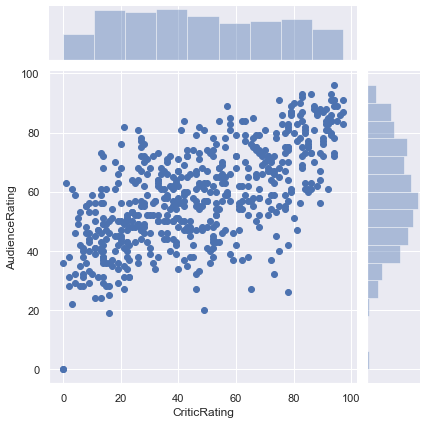

In [72]:
#investigate relationship between CriticRating and AudienceRating
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')


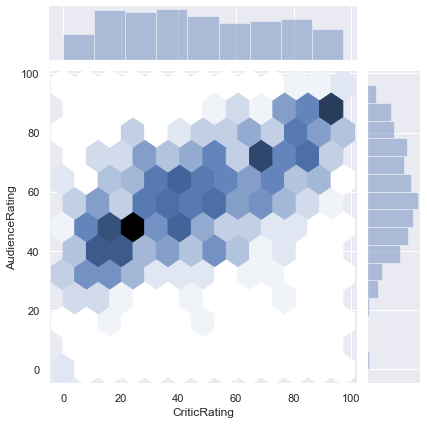

In [74]:
#default style is scatter
#we can change the visualization style by pressing Shift + Tab
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', 
                  kind = 'hex')
#Hexagon groups the clusters
#and the clusters are associated with distributions

**Histograms**



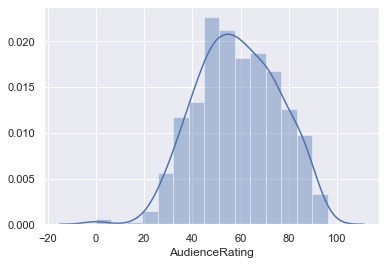

In [75]:
#we already know about hist
ml = sns.distplot(movies.AudienceRating, bins =15)

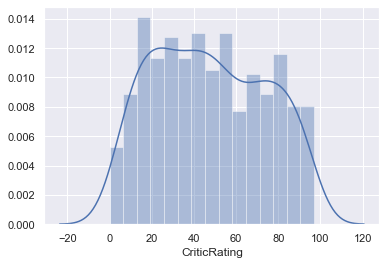

In [76]:
m2 = sns.distplot(movies.CriticRating, bins =15)

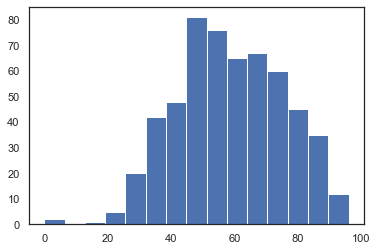

In [81]:
#without seaborn
sns.set_style('white') # to change styling- darkrid
nl = plt.hist(movies.AudienceRating, bins = 15)


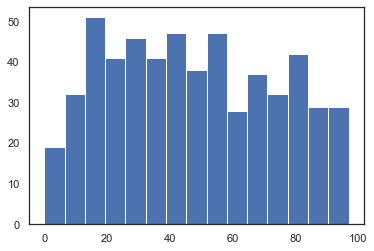

In [84]:
sns.set_style('white')

#sns.set_style('darkgrid') # to change styling- darkrid
nl = plt.hist(movies.CriticRating, bins = 15)

The Audience Rating Histogram is normally distributed, it has a bell curve unlike the CriticRating Histogram. Perphaps the emotional behaviour of Audience and Critics differs when rating a movie. Usually, audience rate movies based on emotions,  natural intuitions while critics might rate based on plot, lighting, pictures, sound effects

**Stacked Histogram**

In [85]:
#Stacked Histograms

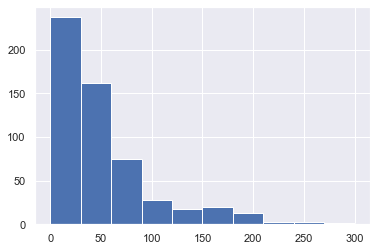

In [91]:
sns.set_style('darkgrid')
plt.hist(movies.BudgetMillions)
plt.show() #shows only the plot

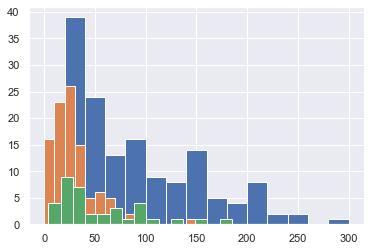

In [98]:
#Let's filter for Genre-Drama
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show()
#Does not look good, they are overlayed

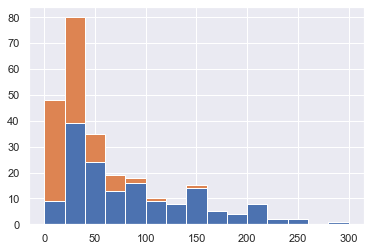

In [103]:
#let's create them as stacked
#we have to create a list
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions],\
         bins = 15, stacked = True)
plt.show()

In [106]:
#Coding Challenge
#What if we have 50 list items to add?
# We can use loops to automate the process
#What are we iterating? Genre

for gen in movies.Genre.cat.categories:
    print(gen)


Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


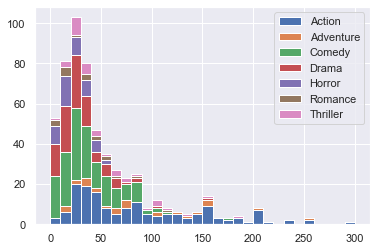

In [115]:
#We want a loop to automate the task
list1 = list() # 
labels = list()
for  gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    labels.append(gen) #to create label of the genre
h =plt.hist(list1, bins =30, stacked = True, rwidth =1, label =labels)
plt.legend()
plt.show()
# rwidth: ratio used close or increase gaps spacing
#rwidth of 1 is = 100( no gaps)

**KDE Plots**

In [117]:
#Kernel Density Estimate Plots
#how do we visualize audience and audience rating?

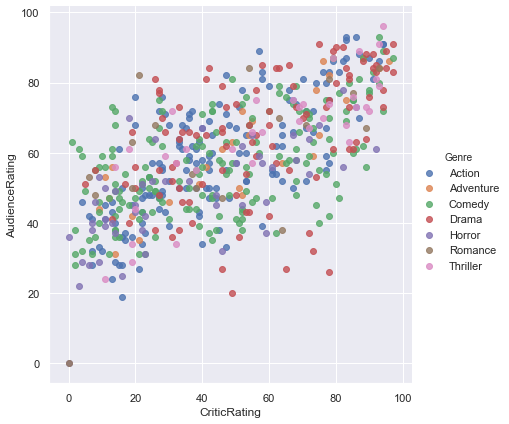

In [120]:
vis1 = sns.lmplot(data = movies, x = 'CriticRating', y = 'AudienceRating', \
                 fit_reg = False, hue = 'Genre', size = 6, aspect = 1)

In [121]:
# Can we visualize this data in a better way?
# you can check seaborn gallery for ideas


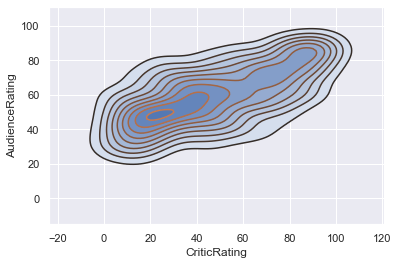

In [169]:
#create KDE plot

k1 = sns.kdeplot(movies.CriticRating, movies. AudienceRating,\
                 shade = True, shade_lowest =False, cmaps ='Reds')
#kde shows how the density of data points is distributed  between two vaiables in the chart
#shade_lowest let's us see the grid

#TIPS: to get smooth edges

k1b = sns.kdeplot(movies.CriticRating, movies. AudienceRating,\
                cmaps ='Reds')

#the darker the shade, the higher the density

**Working with Subplot**

In [130]:
#import packages
import pandas as pd
import numpy as np
import os # functions for operating system

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

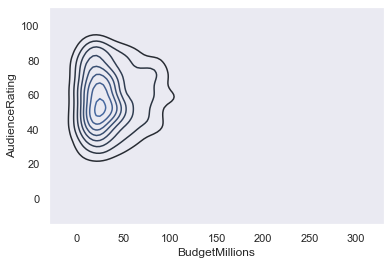

In [132]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)
#Insight:
#A $50m budget movie has a least Audience rating of 22
#and max rating of about 95
#Audience Rating is more concentrated between 40 and 60

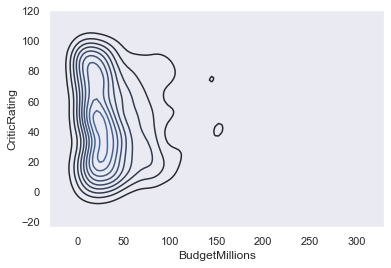

In [134]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

In [135]:
# Critic Rating is concentrated between 20 and 60

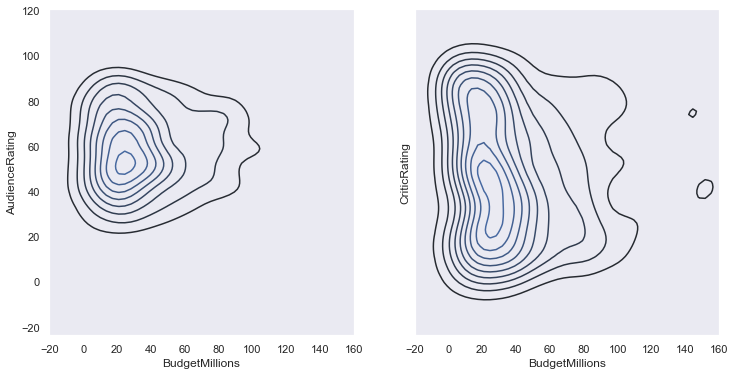

In [141]:
#Subplots
f, axes = plt.subplots(1, 2, figsize = (12,6), sharex=True, sharey=True) # this would plot 1 row , 2 columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0])
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax =axes[1])
k1.set(xlim= (-20,160))
plt.show()
#f is figure
#ax is the axes (an array of two charts)

**Violin Plots**

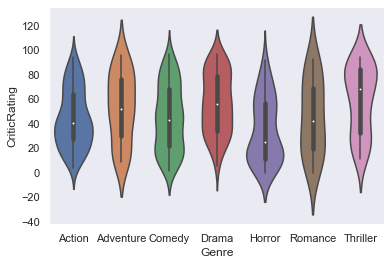

In [142]:
#ViolinPlots

z = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating')
#the width of the violinplots depicts the number of observation
#a wider violinplot depicts larger observations

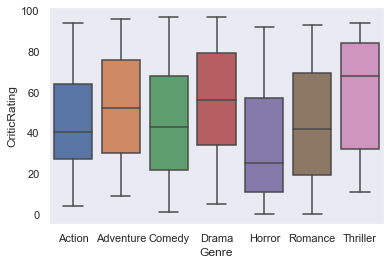

In [143]:
w = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')
#shorter or smaller quartile depicts high density of observation
#Horror movies have the lowest median and Thriller has the highest median
#it seems it's better to create thriller movies than horror movies

**Facet Grid**

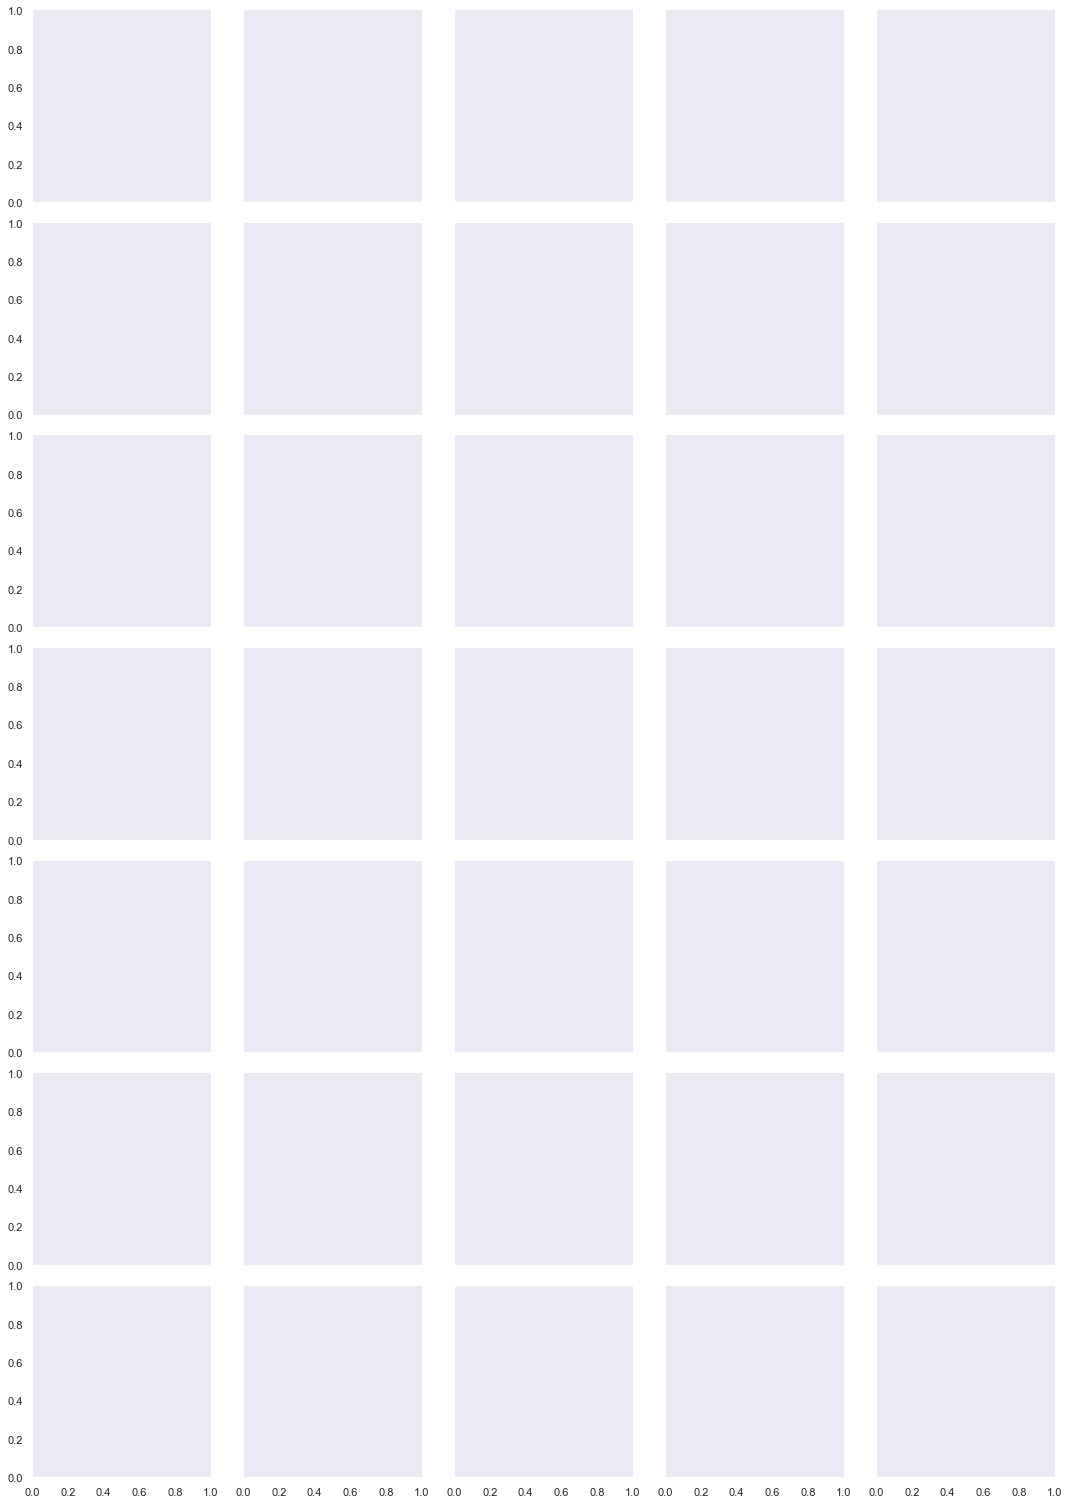

In [145]:
#Facet Grid
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')

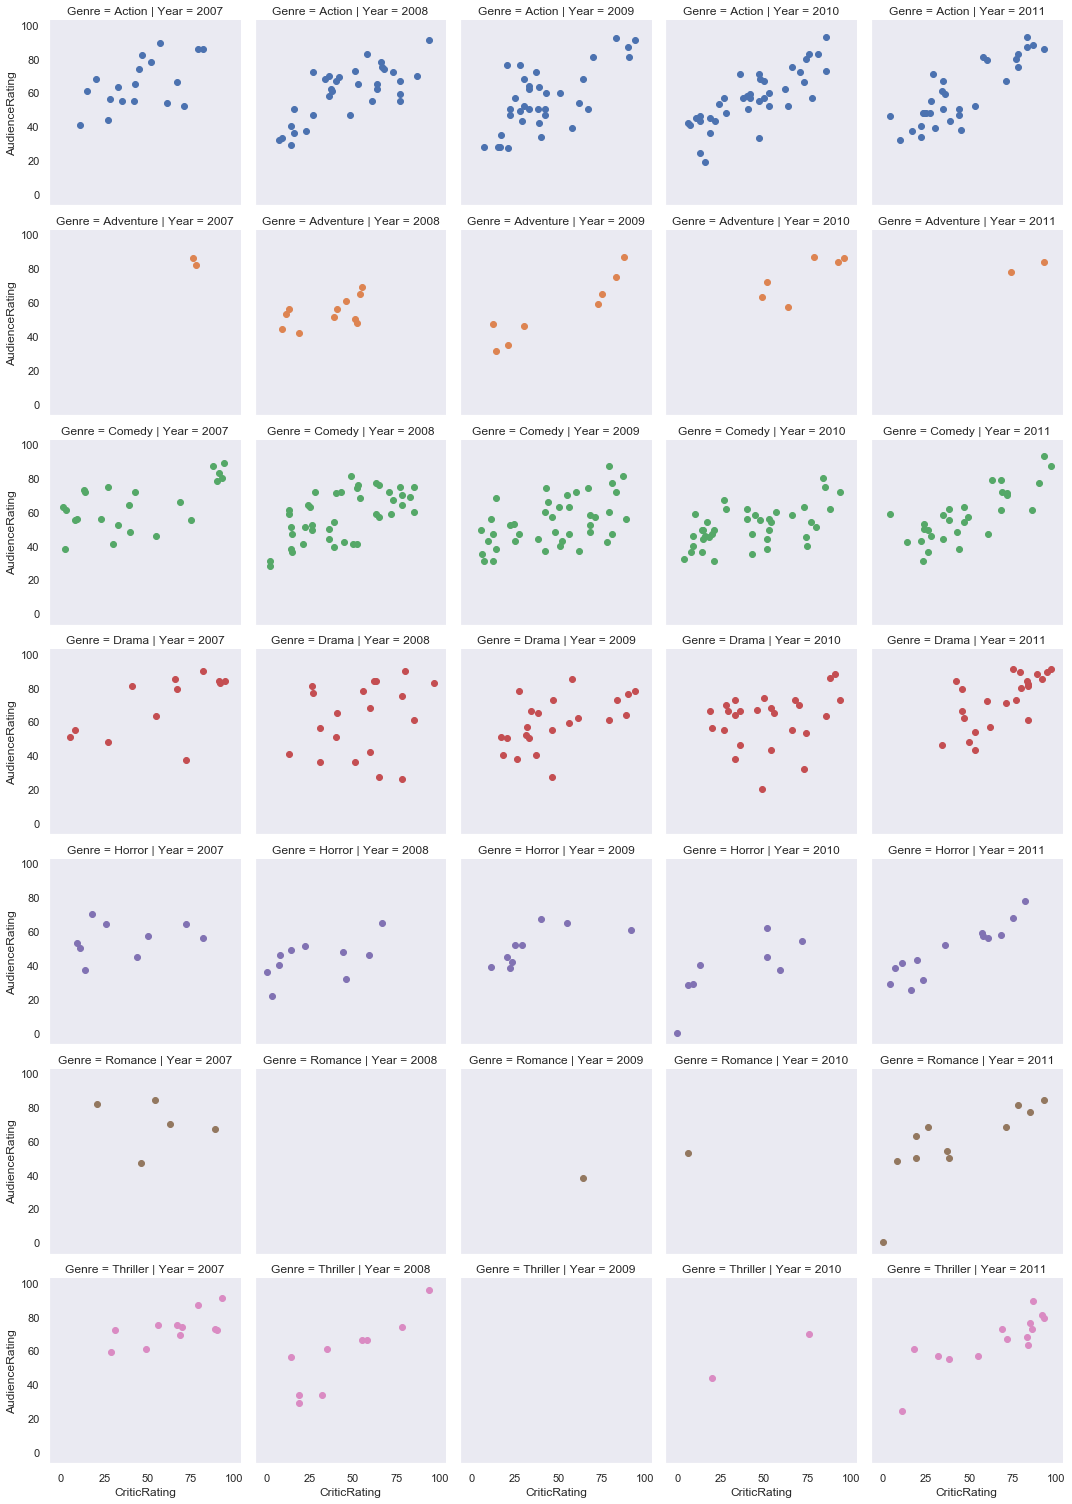

In [149]:
#Apply the map function to a scatterplot
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

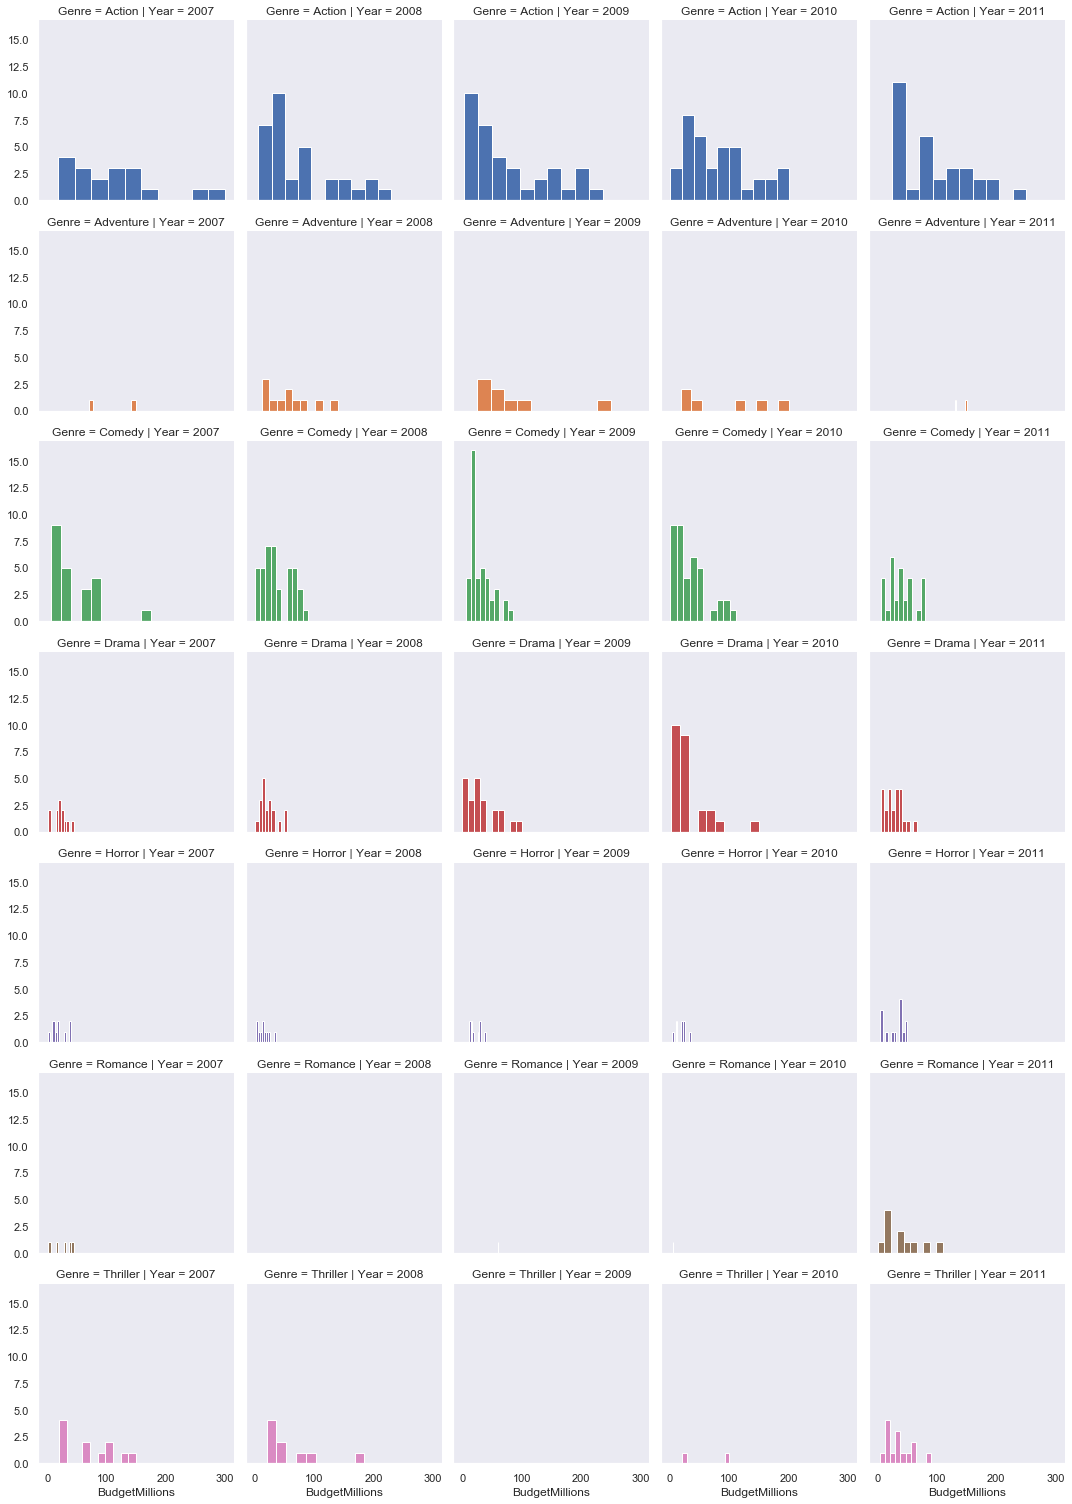

In [150]:
#can populate with any type of chart. Example:histogram 
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions')

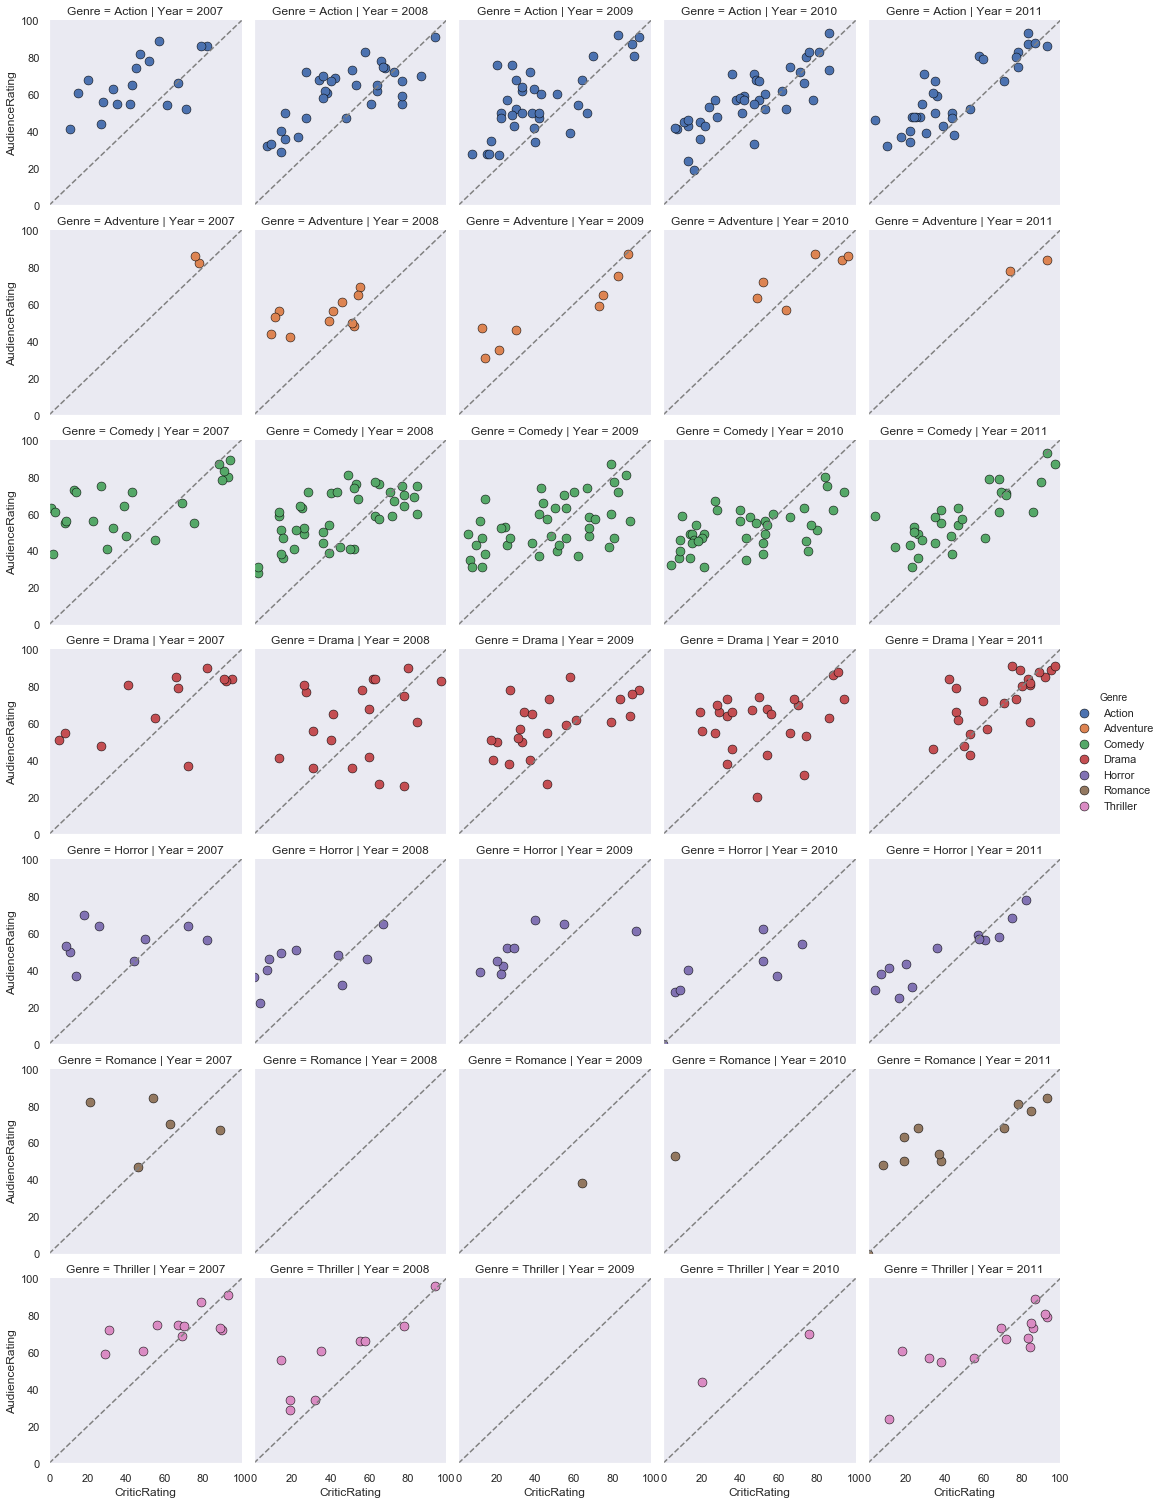

In [158]:
#Back to scatterplots:
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
kws = dict( s = 80, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating' , **kws)
#control axes and adding diagonals
g.set(xlim=(0,100), ylim=(0,100))
#plt.show()

#we create a loop foor the diagonal
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c ='gray', ls='--')
    
#add a legend
g.add_legend()

**Building Dashboard**

In [160]:
#import packages
import pandas as pd
import numpy as np
import os # functions for operating system

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

[(-20, 160)]

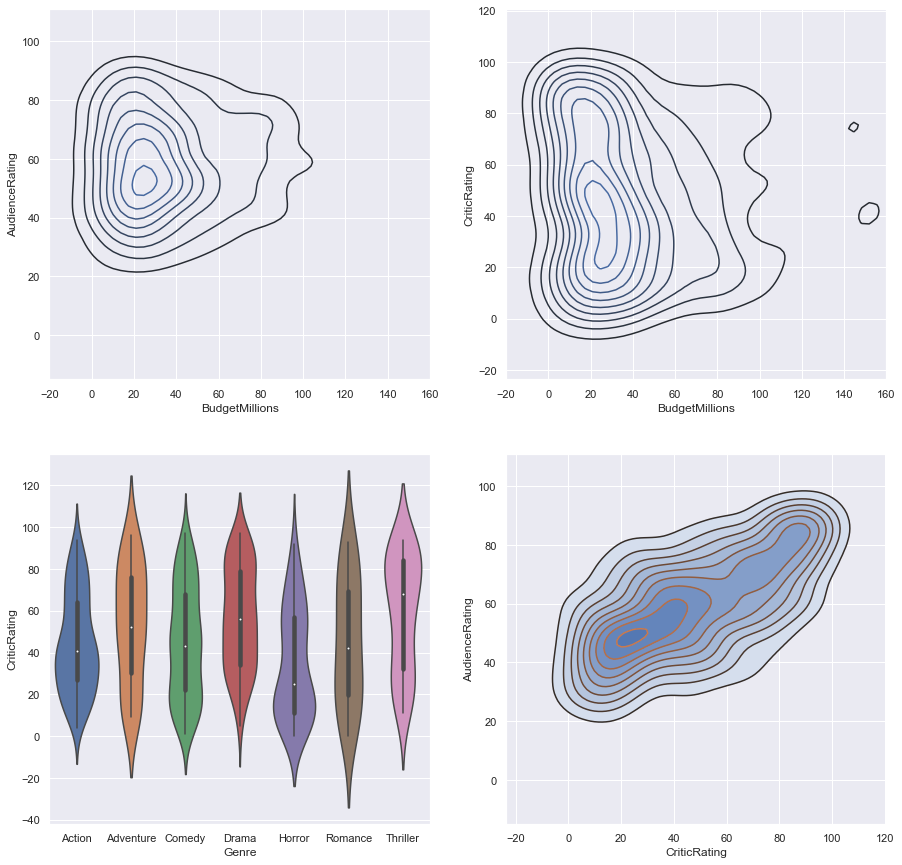

In [177]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15, 15 ))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,\
                 ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 ax =axes[0,1])
k1.set(xlim= (-20,160))
k2.set(xlim= (-20,160))
z = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating',\
                  ax =axes [1,0])

k4a = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                 shade = True, shade_lowest =False, cmaps ='Reds',\
                ax =axes[1,1])

k4b = sns.kdeplot(movies.CriticRating, movies. AudienceRating,\
                cmaps ='Reds', ax =axes[1,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))


#let's add a non-seaborn plot

#axes[1,1].hist(movies.CriticRating, bins = 15)


**Styling Tips**


[(-20, 160)]

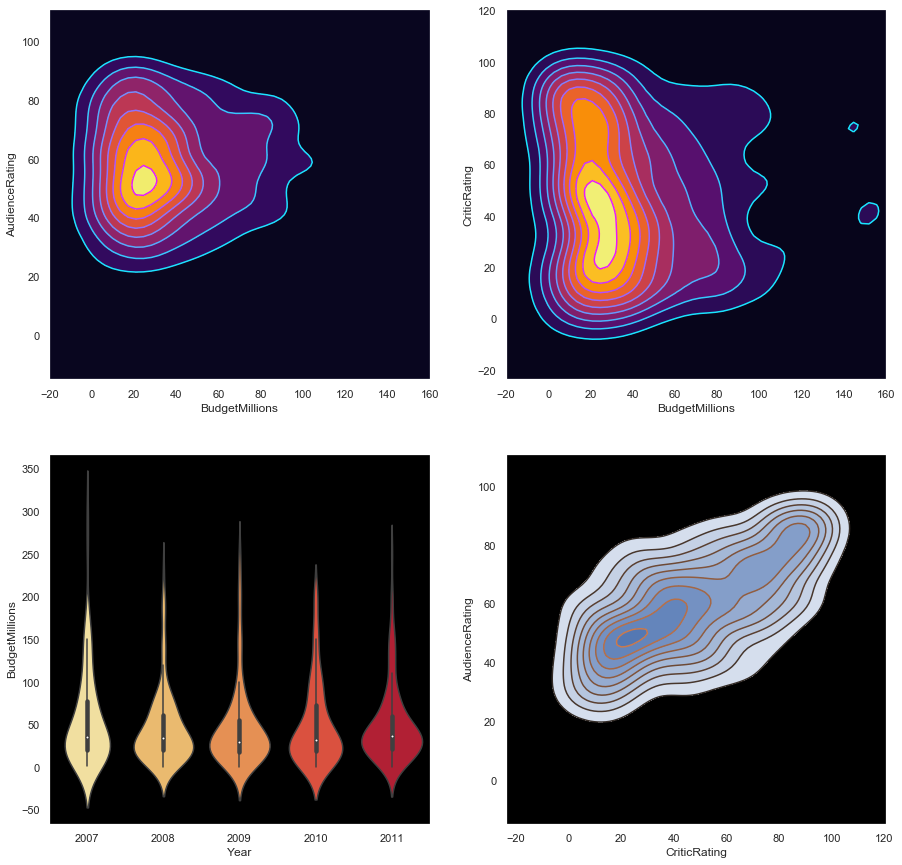

In [185]:
sns.set_style('dark',{"axes.facecolor": "black"}) #white, whitegrid, dark
f, axes = plt.subplots(2,2, figsize = (15, 15 ))

#plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,\
                shade=True, shade_lowest=True, cmap= 'inferno',\
                 ax = axes[0,0])

#add outline
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,\
                 cmap= 'cool', ax = axes[0,0])

#plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                shade=True, shade_lowest=True, cmap= 'inferno',\
                 ax =axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                cmap= 'cool', ax =axes[0,1])

k1.set(xlim= (-20,160))
k2.set(xlim= (-20,160))

#plot [1,0,]
z = sns.violinplot(data = movies, x = 'Year', y = 'BudgetMillions',\
                  ax =axes [1,0], palette = 'YlOrRd')

#plot[1,1]
k4a = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                 shade = True, shade_lowest =False, cmaps ='Blue_r',\
                ax =axes[1,1])

k4b = sns.kdeplot(movies.CriticRating, movies. AudienceRating,\
                cmaps ='gist_gray_r', ax =axes[1,1])


k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))


#let's add a non-seaborn plot

#axes[1,1].hist(movies.CriticRating, bins = 15)

In [ ]:
#let's make the histogram look better

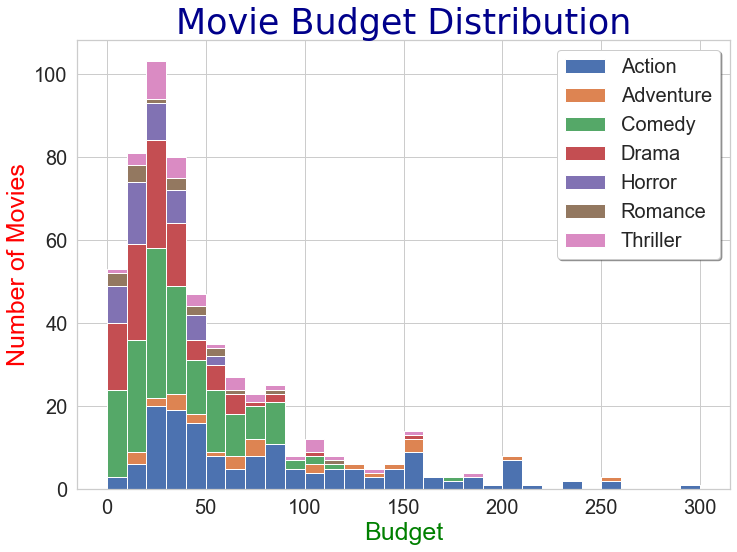

In [199]:
#We want a loop to automate the task
list1 = list() # 
labels = list()
for  gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    labels.append(gen) #to create label of the genre
    
sns.set_style("whitegrid")    
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
h =plt.hist(list1, bins =30, stacked = True, rwidth =1, label =labels)
plt.title("Movie Budget Distribution", fontsize =35,\
         color='DarkBlue', fontname ='Console')
plt.ylabel('Number of Movies', fontsize=25, color='Red')
plt.xlabel('Budget', fontsize =25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True,\
           framealpha=1, prop={'size': 20})
plt.show()
# rwidth: ratio used close or increase gaps spacing
#rwidth of 1 is = 100( no gaps)
#change chartsize